# Predict GOOGL stock price using Linear Regression 

## Introduction

**Description:** 
Using Linear Regression in sci-kit learn to predict gender based on certain features

**Data:** https://www.kaggle.com/datasets/samanfatima7/2020-2025-google-stock-dataset

**Tools:**
```python
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression 
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
```


## Procedure
### 1. Prepare and clean data
- Import CSV file as pandas dataframe
- Clean data by removing NaN values (first row)
- Select `"Close"` column and shift to create `"lag_n"` features to create `"df_close"`

In [91]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samanfatima7/2020-2025-google-stock-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/anakin./.cache/kagglehub/datasets/samanfatima7/2020-2025-google-stock-dataset/versions/1


In [92]:
import os
files = [file for file in os.listdir(path)]
print(files)

['google_5yr_one.csv']


In [93]:
# Check basic information of the csv

import pandas as pd

csv_path = os.path.join(path,files[0])
df_full = pd.read_csv(csv_path)
print(df_full.head(), "\n")
print(df_full.info())


         Date              Close               High                Low  \
0         NaN              GOOGL              GOOGL              GOOGL   
1  2020-06-04   70.3785171508789  71.72309429138843  69.96599205492319   
2  2020-06-05  71.65840148925781   71.9709103787135   70.0461071028752   
3  2020-06-08  72.05748748779297  72.10525562528537  70.88509140875318   
4  2020-06-09  72.25852966308594  73.04079279119881  71.77484210279437   

                Open    Volume  
0              GOOGL     GOOGL  
1   71.4971694316438  26982000  
2  70.44520002096422  42642000  
3    70.974667107052  33878000  
4  71.91816171630913  33624000   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   obje

In [94]:
# check if there's any missing value
print(df_full.isna().sum())

Date      1
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [95]:
# clean the first row as it's the only NaN column
df = df_full.drop(0, axis=0)
print(df)

            Date               Close                High                 Low  \
1     2020-06-04    70.3785171508789   71.72309429138843   69.96599205492319   
2     2020-06-05   71.65840148925781    71.9709103787135    70.0461071028752   
3     2020-06-08   72.05748748779297   72.10525562528537   70.88509140875318   
4     2020-06-09   72.25852966308594   73.04079279119881   71.77484210279437   
5     2020-06-10   72.88652801513672   73.28810385800969   72.37198974644225   
...          ...                 ...                 ...                 ...   
1251  2025-05-27  172.89999389648438   173.1699981689453               170.0   
1252  2025-05-28  172.36000061035156  175.27000427246094  171.91000366210938   
1253  2025-05-29  171.86000061035156   174.4199981689453   170.6300048828125   
1254  2025-05-30  171.74000549316406   172.2100067138672  167.44000244140625   
1255  2025-06-02  169.02999877929688   169.8699951171875  167.38999938964844   

                    Open    Volume  
1 

In [96]:
# feature engineering
df_close = df.loc[:, "Date":"Close"]
df_close["lag_1"] = df_close["Close"].shift(1)
df_close["lag_2"] = df_close["Close"].shift(2)
df_close["lag_3"] = df_close["Close"].shift(3)
print(df_close)

            Date               Close               lag_1               lag_2  \
1     2020-06-04    70.3785171508789                None                None   
2     2020-06-05   71.65840148925781    70.3785171508789                None   
3     2020-06-08   72.05748748779297   71.65840148925781    70.3785171508789   
4     2020-06-09   72.25852966308594   72.05748748779297   71.65840148925781   
5     2020-06-10   72.88652801513672   72.25852966308594   72.05748748779297   
...          ...                 ...                 ...                 ...   
1251  2025-05-27  172.89999389648438  168.47000122070312   170.8699951171875   
1252  2025-05-28  172.36000061035156  172.89999389648438  168.47000122070312   
1253  2025-05-29  171.86000061035156  172.36000061035156  172.89999389648438   
1254  2025-05-30  171.74000549316406  171.86000061035156  172.36000061035156   
1255  2025-06-02  169.02999877929688  171.74000549316406  171.86000061035156   

                   lag_3  
1           

/var/folders/31/yy58x4y13nq668wbsn7pdk2r0000gn/T/ipykernel_97261/2873855208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close["lag_1"] = df_close["Close"].shift(1)
/var/folders/31/yy58x4y13nq668wbsn7pdk2r0000gn/T/ipykernel_97261/2873855208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close["lag_2"] = df_close["Close"].shift(2)
/var/folders/31/yy58x4y13nq668wbsn7pdk2r0000gn/T/ipykernel_97261/2873855208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [97]:
# remove first 3 rows as they contains NaN value from shifting

df_close.dropna(inplace=True)
print(df_close)

            Date               Close               lag_1               lag_2  \
4     2020-06-09   72.25852966308594   72.05748748779297   71.65840148925781   
5     2020-06-10   72.88652801513672   72.25852966308594   72.05748748779297   
6     2020-06-11     69.761474609375   72.88652801513672   72.25852966308594   
7     2020-06-12   70.30985260009766     69.761474609375   72.88652801513672   
8     2020-06-15   70.69898986816406   70.30985260009766     69.761474609375   
...          ...                 ...                 ...                 ...   
1251  2025-05-27  172.89999389648438  168.47000122070312   170.8699951171875   
1252  2025-05-28  172.36000061035156  172.89999389648438  168.47000122070312   
1253  2025-05-29  171.86000061035156  172.36000061035156  172.89999389648438   
1254  2025-05-30  171.74000549316406  171.86000061035156  172.36000061035156   
1255  2025-06-02  169.02999877929688  171.74000549316406  171.86000061035156   

                   lag_3  
4       70.3

/var/folders/31/yy58x4y13nq668wbsn7pdk2r0000gn/T/ipykernel_97261/635355588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.dropna(inplace=True)


### 2. Train model and metric test
- Split data into test and train using `train_test_split`
- Train LinearRegression and DecisionTreeRegressor model
- Prepare performance test by `performance_checker`
- Test performance of models separately and plot graphs compared to original data


In [98]:
# Prepare train and test data
from sklearn.model_selection import train_test_split

x = df_close.iloc[:, 2:5] # features
y = df_close.iloc[:, 1] # target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

print(x)
print("\n")
print(y)


                   lag_1               lag_2               lag_3
4      72.05748748779297   71.65840148925781    70.3785171508789
5      72.25852966308594   72.05748748779297   71.65840148925781
6      72.88652801513672   72.25852966308594   72.05748748779297
7        69.761474609375   72.88652801513672   72.25852966308594
8      70.30985260009766     69.761474609375   72.88652801513672
...                  ...                 ...                 ...
1251  168.47000122070312   170.8699951171875  168.55999755859375
1252  172.89999389648438  168.47000122070312   170.8699951171875
1253  172.36000061035156  172.89999389648438  168.47000122070312
1254  171.86000061035156  172.36000061035156  172.89999389648438
1255  171.74000549316406  171.86000061035156  172.36000061035156

[1252 rows x 3 columns]


4        72.25852966308594
5        72.88652801513672
6          69.761474609375
7        70.30985260009766
8        70.69898986816406
               ...        
1251    172.89999389648438
1252

In [99]:
# Train linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [100]:
# Train decision tree regression
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(criterion="squared_error", max_depth=None)
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def performance_checker(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)
    mape = np.mean((np.abs(y_pred - y_test)/y_test))*100
    print("MAE:",f"{mae}")
    print("MSE:",f"{mse}")
    print("R2:",f"{r2}")
    print("MAPE:",f"{mape}")


In [102]:
# Check performance of linear regression model
y_pred = model.predict(x_test)
y_test_array = [float(x) for x in y_test.to_numpy()]

performance_checker(y_test_array, y_pred)

MAE: 1.7376548112958807
MSE: 5.202891382911559
R2: 0.9947690431253289
MAPE: 1.3927941535765456


In [103]:
# Check performance of tree regression model
tree_pred = tree.predict(x_test)
performance_checker(y_test_array, tree_pred)

MAE: 2.44104192612019
MSE: 10.143811453808938
R2: 0.9898014706910957
MAPE: 1.938774157597713


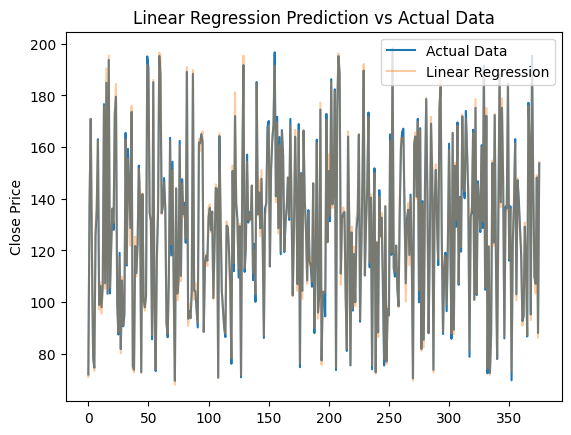

In [104]:
import matplotlib.pyplot as plt

plt.plot(y_test_array, label="Actual Data")
plt.plot(y_pred, label="Linear Regression", alpha=0.4)

plt.legend()
plt.ylabel("Close Price")
plt.title("Linear Regression Prediction vs Actual Data")
plt.show()

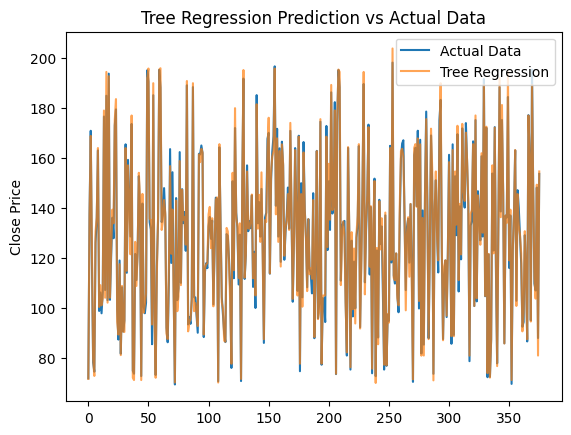

In [105]:
import matplotlib.pyplot as plt

plt.plot(y_test_array, label="Actual Data")
plt.plot(tree_pred, label="Tree Regression", alpha=0.7)

plt.legend()
plt.ylabel("Close Price")
plt.title("Tree Regression Prediction vs Actual Data")
plt.show()

### 3. Predict future stock price
- Using `LinearRegression` model to predict future stock prices
- Predict future stock prices by last_seen data then loop
    - Use Dataframe as input of `model.predict()`
    - `model.predict` returns values as array
- Store new_date as list of dictionaries and turn to DataFrame at last
- Returns an array future that stores all the future stock price, and a Dataframe future_df that stores future stock prices with dates

In [106]:
# Predict stock price for future 50 days
def predict_future_stock(df=df_close, days=5, model=model):
    last_seen = df.iloc[-1].copy()
    future, future_df = [], []
    
    # Turn str columns into float, datetime
    last_seen["Date"] = pd.to_datetime(last_seen["Date"])
    last_seen["Close"] = pd.to_numeric(last_seen["Close"], errors="coerce")
    last_seen["lag_1"] = pd.to_numeric(last_seen["lag_1"], errors="coerce")
    last_seen["lag_2"] = pd.to_numeric(last_seen["lag_2"], errors="coerce")
    last_seen["lag_3"] = pd.to_numeric(last_seen["lag_3"], errors="coerce")

    # add new data for each day
    for i in range(days):
        
        # One row dataframe as entry
        x_input = pd.DataFrame([{
            "lag_1": last_seen["Close"],
            "lag_2": last_seen["lag_1"],
            "lag_3": last_seen["lag_2"]
        }])
        
        pred = model.predict(x_input)[0] # predict returns an array
        future.append(pred)
        
        # future rows
        new_date = {
            "Date": last_seen["Date"] + pd.Timedelta(days=1),
            "Close":pred,
            "lag_1": last_seen["Close"],
            "lag_2": last_seen["lag_1"],
            "lag_3": last_seen["lag_2"]
        }
        future_df.append(new_date)
        
        # update future row as the last row
        last_seen = pd.Series(new_date)
    
    # Create dataframe using all future rows
    future_df = pd.DataFrame(future_df, columns=["Date","Close", "lag_1", "lag_2", "lag_3"])
    return future, future_df

future, future_df = predict_future_stock(days=50)
print(future_df)


    



         Date       Close       lag_1       lag_2       lag_3
0  2025-06-03  169.066549  169.029999  171.740005  171.860001
1  2025-06-04  168.977753  169.066549  169.029999  171.740005
2  2025-06-05  168.990495  168.977753  169.066549  169.029999
3  2025-06-06  168.997499  168.990495  168.977753  169.066549
4  2025-06-07  169.008242  168.997499  168.990495  168.977753
5  2025-06-08  169.018708  169.008242  168.997499  168.990495
6  2025-06-09  169.029286  169.018708  169.008242  168.997499
7  2025-06-10  169.039827  169.029286  169.018708  169.008242
8  2025-06-11  169.050345  169.039827  169.029286  169.018708
9  2025-06-12  169.060836  169.050345  169.039827  169.029286
10 2025-06-13  169.071299  169.060836  169.050345  169.039827
11 2025-06-14  169.081736  169.071299  169.060836  169.050345
12 2025-06-15  169.092146  169.081736  169.071299  169.060836
13 2025-06-16  169.102528  169.092146  169.081736  169.071299
14 2025-06-17  169.112884  169.102528  169.092146  169.081736
15 2025-